Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Test set score: 0.97
Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.97
Best estimator:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000465,0.000058,0.000166,0.000012,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
1,0.000467,0.000022,0.000161,0.000003,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
2,0.000560,0.000078,0.000204,0.000048,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
3,0.000459,0.000005,0.000161,0.000003,0.001,1,"{'C': 0.001, 'gamma': 1}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
4,0.000637,0.000274,0.000191,0.000041,0.001,10,"{'C': 0.001, 'gamma': 10}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852


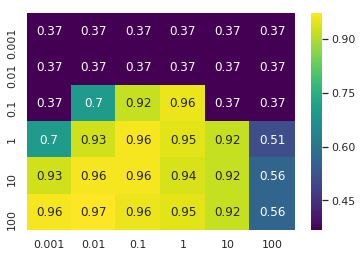

In [2]:
"""
Exercise to find best parameters for Support Vector Classifier on iris data set.
Test set score of 0.97 is achieved.
Based on A.Muller Intro to Machine Learning
"""

# set possible parameters
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))


# prepare Grid Search with 5 iterations
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

# load the data and split it for the model
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

# implement grid search
grid_search.fit(X_train, y_train)
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
# get the best model = best parameters to use
print("Best estimator:\n{}".format(grid_search.best_estimator_))

# get results for visualisation
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

import numpy as np
scores = np.array(results.mean_test_score).reshape(6, 6)


# make score(test parameters) heatmap
%matplotlib inline
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.heatmap(scores, annot=True, xticklabels=param_grid['gamma'], 
                 yticklabels=param_grid['C'], cmap="viridis")
plt.show()